### ▶2023/08/02 杉井さんのデータ前処理プログラム「preprocess.pyのテスト」

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from preprocess import Preprocess

In [3]:
data = Preprocess('http://skill.shinshu-u.ac.jp/2013/5-13/20130513140841_18-4-0-0-0_strokes.txt/strokes/pointlists', 2)
df = data.df_dropcol

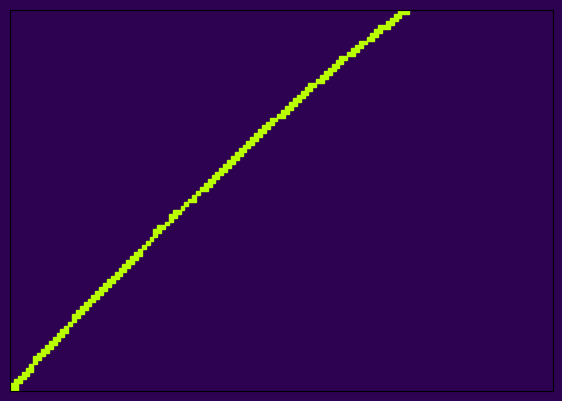

In [6]:
df_point = df[df['shape_int'] == 1]
data.draw_stroke_px(df_point[1:2])
# df_point

In [17]:
# 用紙のサイズの大きさの変更
def draw_stroke(df):
    SCALE = 0.05
    plt.rcParams['font.family'] = 'Times New Roman'
    STROKE_COLOR = 'blue'
    FACE_COLOR = 'white'
    STROKE_WIDTH = 0.01
    FIG_SIZE = (420*SCALE, 297*SCALE)
    fig, ax = plt.subplots(facecolor=FACE_COLOR, figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, 
                    bottom=False, left=False, right=False, top=False)
    ax.set_xlim([0, 420])    # x方向の描画範囲を指定
    ax.set_ylim([0, 297])    # y方向の描画範囲を指定
    ax.set_facecolor(FACE_COLOR)
    ax.invert_yaxis()
    
    for x_list, y_list in zip(df['ptx_mm_lerp'], df['pty_mm_lerp']):
        ax.plot(x_list, y_list, color=STROKE_COLOR, linewidth=STROKE_WIDTH, marker='.', markersize=5)
        
    plt.show()
    return

df_lerp = data.df_lerp
# draw_stroke(df_lerp[:2])
num = 2
for x, y in zip(df_lerp['ptx_mm_lerp'][num:num+1], df_lerp['pty_mm_lerp'][num:num+1]):
    len_list = []
    for i in range(1, len(x)):
        len_next = math.sqrt((x[i] - x[i-1])**2 + (y[i] - y[i-1])**2)
        len_list.append(len_next)

df_csv = pd.DataFrame({'len': len_list})
df_csv.to_csv(f'../temp/len_{num}.csv')

cnt_list = []
for x in df_lerp['ptx_mm_lerp']:
    cnt_list.append(len(x))
df_csv = pd.DataFrame({'len': cnt_list})
df_csv.to_csv(f'../temp/cnt.csv')

In [16]:
df_point

,time,max_points,shape_str,pressure_avg,shape_int,len_mm,ptx_mm,pty_mm,px_3mm_grid,px_3mm_grid_flat
4,7,2,Point,19.000000,0,0.676041,"[176.9625, 177.525]","[21.599999999999998, 21.974999999999998]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10,16,1,Point,0.000000,0,0.000000,[169.9125],[33.7125],"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
12,17,2,Point,0.000000,0,1.341641,"[55.2375, 55.8375]","[136.575, 135.375]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
17,20,3,Point,59.333333,0,0.950108,"[97.425, 97.05, 97.27499999999999]","[204.7125, 205.0125, 205.42499999999998]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
19,24,1,Point,0.000000,0,0.000000,[65.96249999999999],[134.8875],"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...
818,1053,2,Point,44.000000,0,1.897367,"[236.1, 234.29999999999998]","[34.425, 35.025]","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
830,1076,1,Point,18.000000,0,0.000000,[147.3375],[276.1125],"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
836,1090,1,Point,2.000000,0,0.000000,[178.04999999999998],[32.2125],"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
840,1095,1,Point,0.000000,0,0.000000,[174.4125],[40.574999999999996],"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


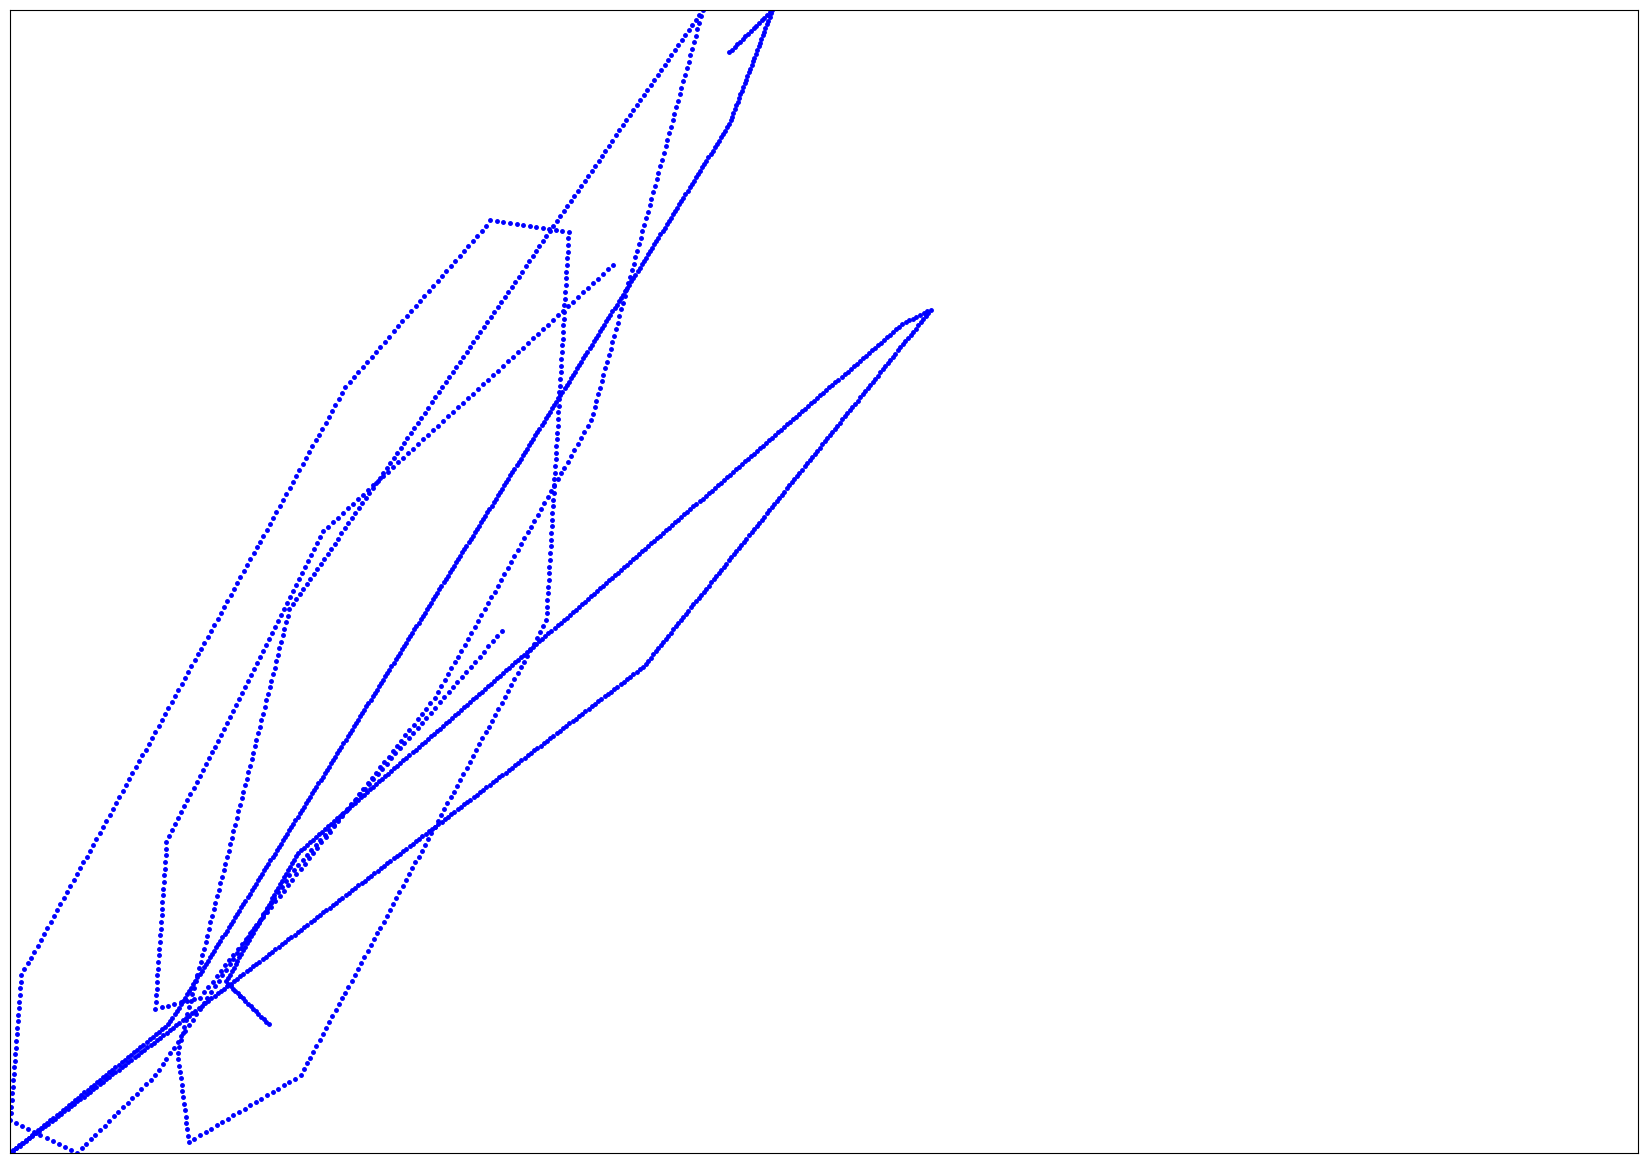

In [12]:
# 用紙のサイズの大きさの変更
def draw_stroke(df):
    SCALE = 0.05
    plt.rcParams['font.family'] = 'Times New Roman'
    STROKE_COLOR = 'blue'
    FACE_COLOR = 'white'
    STROKE_WIDTH = 0.01
    FIG_SIZE = (420*SCALE, 297*SCALE)
    fig, ax = plt.subplots(facecolor=FACE_COLOR, figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, 
                    bottom=False, left=False, right=False, top=False)
    ax.set_xlim([0, 420])    # x方向の描画範囲を指定
    ax.set_ylim([0, 297])    # y方向の描画範囲を指定
    ax.set_facecolor(FACE_COLOR)
    ax.invert_yaxis()
    
    for x_list, y_list in zip(df['ptx_mm_slide_ex'], df['pty_mm_slide_ex']):
        ax.plot(x_list, y_list, color=STROKE_COLOR, linewidth=STROKE_WIDTH, marker='.', markersize=5)
        
    plt.show()
    return

df_slide_ex = data.df_slide_ex
draw_stroke(df_slide_ex[:2])

In [35]:
from data_preprocess import DataPreprocess

data = DataPreprocess()
data.get_df('http://skill.shinshu-u.ac.jp/2013/4-18/20130417140951_18-4-0-0-0_strokes.txt/strokes/pointlists')
data.conv_str_to_coord()
data.unify_coord(1)
data.lerp_stroke()
data.slide_expand_stroke()
data.binarize_stroke()


### 2次元配列の参照方法:url(https://qiita.com/sho11hei12-1998/items/2458aa0822cc6e7268fa)

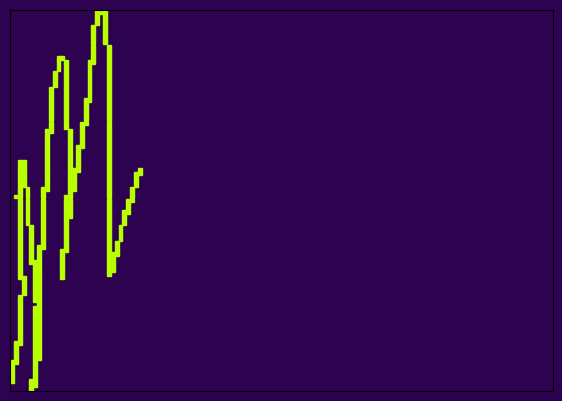

In [44]:
import matplotlib.pyplot as plt
from matplotlib import patches

def draw_stroke_px(df):
    canvas_size = (297, 420)
    SCALE = 0.05
    NORM_DIVISOR = 3
    plt.rcParams['font.family'] = 'Times New Roman'
    STROKE_COLOR = '#B9FF00'
    FACE_COLOR = '#2C0251'
    FIG_SIZE = (canvas_size[1]/NORM_DIVISOR*SCALE, canvas_size[0]/NORM_DIVISOR*SCALE)
    fig, ax = plt.subplots(facecolor=FACE_COLOR, figsize=(FIG_SIZE[0],FIG_SIZE[1]))
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, 
                    bottom=False, left=False, right=False, top=False)
    ax.set_xlim([0, canvas_size[1]/NORM_DIVISOR])    # x方向の描画範囲を指定
    ax.set_ylim([0, canvas_size[0]/NORM_DIVISOR])    # y方向の描画範囲を指定
    ax.set_facecolor(FACE_COLOR)
    ax.invert_yaxis()
    
    for px_grid in df['px_in_3_grid']:
        for x in range(140):
            for y in range(99):
                if px_grid[y, x] == 1:
                    # ax.axvspan(x, x+1, y, y+1, color=STROKE_COLOR, alpha=0.5)
                    # ax.scatter(x, y)
                    r = patches.Rectangle(xy=(x, y), width=1, height=1, fc=STROKE_COLOR, ec=STROKE_COLOR, fill=True)
                    ax.add_patch(r)
    plt.show()
    return

df_norm_grid = data.df_norm_grid
num = 799
draw_stroke_px(df_norm_grid[num:num+1])
# print(df_norm_grid['type_str'][num:num+1])
